# Loading the budget details for pre-processing
Created a dataframe to populate the campaign details from the case study, standardized the column names and checked the data for missing values

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm

In [94]:
df_campaign = pd.read_excel('TA_Budget_Allocation_Dataset.xlsx') #filename updated for analysis 

In [95]:
df_campaign.head()

,PRDT TYPE,BRAND,MILESTONE,TARGET_GROUP,CAMPAIGN_MONTH,SELECTED_QTY,MAILED_COUNT,RESPONSE_COUNT,RESPONSE_SALES_AMT,CUST_SEGMENT
0,Prdt-1,B,12 Months,Targeted,AUGUST,809,809,98,23323.47,CLClubInvite12
1,Prdt-1,B,12 Months,Control,AUGUST,90,90,3,686.98,CLClubInvite12Control
2,Prdt-1,B,12 Months,Targeted,AUGUST,1769,1769,142,30641.22,CLRecall12
3,Prdt-1,B,12 Months,Control,AUGUST,196,196,16,3261.56,CLRecall12Control
4,Prdt-1,B,12 Months,Targeted,AUGUST,205,205,16,2848.48,CLRecallTXandCA12


In [96]:
df_campaign.tail()

,PRDT TYPE,BRAND,MILESTONE,TARGET_GROUP,CAMPAIGN_MONTH,SELECTED_QTY,MAILED_COUNT,RESPONSE_COUNT,RESPONSE_SALES_AMT,CUST_SEGMENT
2355,Prdt-2,E,27 Months,Control,OCTOBER,794,1,0,0.00,RecallNONFirstSight-CG
2356,Prdt-2,E,27 Months,Targeted,OCTOBER,64494,36,0,0.00,RecallNONFirstSight-TG
2357,Prdt-2,E,27 Months,Targeted,OCTOBER,71670,34,0,0.00,RecallNONFirstSight-TG
2358,Prdt-2,E,27 Months,Targeted,OCTOBER,94402,1313,6,398.00,RecallNONFirstSight-TG
2359,Prdt-2,E,27 Months,Targeted,OCTOBER,102984,1305,4,307.48,RecallNONFirstSight-TG


In [97]:
df_campaign.columns = df_campaign.columns.str.lower()

In [98]:
df_campaign.rename(columns = {'prdt type':'prdt_type'}, inplace = True)
df_campaign.head()

,prdt_type,brand,milestone,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,cust_segment
0,Prdt-1,B,12 Months,Targeted,AUGUST,809,809,98,23323.47,CLClubInvite12
1,Prdt-1,B,12 Months,Control,AUGUST,90,90,3,686.98,CLClubInvite12Control
2,Prdt-1,B,12 Months,Targeted,AUGUST,1769,1769,142,30641.22,CLRecall12
3,Prdt-1,B,12 Months,Control,AUGUST,196,196,16,3261.56,CLRecall12Control
4,Prdt-1,B,12 Months,Targeted,AUGUST,205,205,16,2848.48,CLRecallTXandCA12


In [9]:
df_campaign.isna().sum()

prdt_type             0
brand                 0
milestone             0
target_group          0
campaign_month        0
selected_qty          0
mailed_count          0
response_count        0
response_sales_amt    0
cust_segment          0
dtype: int64

No missing values found

# Exploratory Data Analysis

In [99]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 10 columns):
prdt_type             2360 non-null object
brand                 2360 non-null object
milestone             2360 non-null object
target_group          2360 non-null object
campaign_month        2360 non-null object
selected_qty          2360 non-null int64
mailed_count          2360 non-null int64
response_count        2360 non-null int64
response_sales_amt    2360 non-null float64
cust_segment          2360 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 184.5+ KB


In [100]:
df_campaign.describe()

,selected_qty,mailed_count,response_count,response_sales_amt
count,2.360000e+03,2360.000000,2360.000000,2360.000000
mean,1.438556e+04,1361.769915,46.643644,10063.757712
std,1.165510e+05,2557.967184,111.125220,23826.166367
min,6.000000e+00,1.000000,0.000000,0.000000
25%,3.167500e+02,146.000000,3.000000,684.052500
50%,1.474000e+03,365.500000,12.000000,2642.230000
75%,6.698250e+03,1491.000000,43.000000,9875.657500
max,2.599002e+06,24341.000000,2541.000000,572875.430000


In [101]:
print((df_campaign[df_campaign["target_group"] == 'Targeted']["response_sales_amt"].sum())/(df_campaign[df_campaign["target_group"] == 'Targeted']["response_count"].sum())," ",
(df_campaign[df_campaign["target_group"] == 'Control']["response_sales_amt"].sum())/(df_campaign[df_campaign["target_group"] == 'Control']["response_count"].sum()))

216.0355742799571   213.0812964756003


On an average 'Targeted group' (~216.04) has higher average sale value for each response than that for 'Control group' (~213.08)

In [102]:
print((df_campaign[df_campaign["target_group"] == 'Targeted']["response_count"].sum())/(df_campaign[df_campaign["target_group"] == 'Targeted']["mailed_count"].sum())," ",
(df_campaign[df_campaign["target_group"] == 'Control']["response_count"].sum())/(df_campaign[df_campaign["target_group"] == 'Control']["mailed_count"].sum()))

0.034449176146282685   0.03245981808924564


On an average 'Targeted group' (~3.4%) has higher response rate for each response than that for 'Control group' (~3.2%)

In [103]:
pd.crosstab(df_campaign["target_group"],df_campaign["milestone"])

milestone,12 Months,15 Months,18 Months,21 Months,24 Months,27 Months
target_group,,,,,,
Control,186,186,238,186,237,147
Targeted,186,186,238,186,237,147


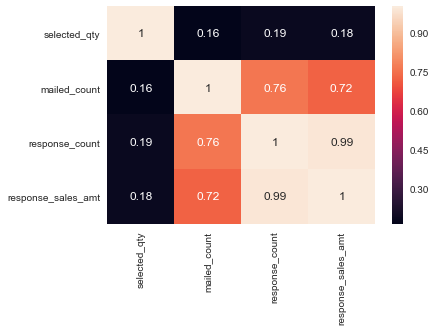

In [104]:
ax = sns.heatmap(df_campaign.corr(), annot=True)

'mailed_count' and 'response_count', and 'response_count' and 'response_sales_amt' have relatively high positive correlation (0.76 and 0.99 respectively)

# Processing the data by addition of metrics for analysis

In [105]:
df_campaign["mail_rate"] = (df_campaign["mailed_count"]/df_campaign["selected_qty"])
df_campaign["response_rate"] = (df_campaign["response_count"]/df_campaign["mailed_count"])
df_campaign["amount_per_response"] = (df_campaign["response_sales_amt"]/df_campaign["response_count"])
df_campaign["amount_per_mail"] = (df_campaign["response_sales_amt"]/df_campaign["mailed_count"])
df_campaign.head()

,prdt_type,brand,milestone,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,cust_segment,mail_rate,response_rate,amount_per_response,amount_per_mail
0,Prdt-1,B,12 Months,Targeted,AUGUST,809,809,98,23323.47,CLClubInvite12,1.0,0.121137,237.994592,28.830000
1,Prdt-1,B,12 Months,Control,AUGUST,90,90,3,686.98,CLClubInvite12Control,1.0,0.033333,228.993333,7.633111
2,Prdt-1,B,12 Months,Targeted,AUGUST,1769,1769,142,30641.22,CLRecall12,1.0,0.080271,215.783239,17.321210
3,Prdt-1,B,12 Months,Control,AUGUST,196,196,16,3261.56,CLRecall12Control,1.0,0.081633,203.847500,16.640612
4,Prdt-1,B,12 Months,Targeted,AUGUST,205,205,16,2848.48,CLRecallTXandCA12,1.0,0.078049,178.030000,13.895024


# Statistical tests for testing hypotheses 

In [42]:
print(stats.shapiro(df_campaign["amount_per_response"]), " ",
stats.shapiro(df_campaign["amount_per_mail"]), " ",stats.shapiro(df_campaign["response_rate"])," ",
     stats.shapiro(df_campaign[df_campaign["target_group"] == 'Targeted']["amount_per_mail"]), " ",
     stats.shapiro(df_campaign[df_campaign["target_group"] == 'Control']["amount_per_mail"]))

(nan, 1.0)   (0.8433917760848999, 2.4102333586386854e-43)   (0.8300217986106873, 1.2611686178923354e-44)   (0.8305805325508118, 1.3637269040679335e-33)   (0.8343371152877808, 2.6785473656699058e-33)


p-value for Normality test is less than 0.05 and hence the response details are not normally distributed

WilcoxonResult(statistic=263566.0, pvalue=6.356639728904065e-12) 
               amount_per_mail  amount_per_response  response_rate
target_group                                                     
Control              5.489551           205.646218       0.026464
Targeted             6.647450           214.548810       0.028421


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


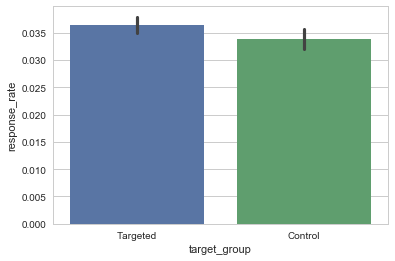

In [106]:
print(stats.wilcoxon(x = df_campaign[df_campaign["target_group"] == 'Targeted']["amount_per_mail"], 
               y = df_campaign[df_campaign["target_group"] == 'Control']["amount_per_mail"]), "\n",
      df_campaign.pivot_table(
    ["amount_per_mail", "response_rate", "amount_per_response"],
    ["target_group"],
    aggfunc="median",
))

sns.barplot(x=df_campaign["target_group"], y=df_campaign["response_rate"])
plt.savefig('response_rate vs target_group')

A p-value of less than 0.05 (Wilcoxon test for non-normal distribution) and subsquent comparison of median values of 'amount_per_mail', 'amount_per_response' and 'response_rate' indicates quantitatively better reponse and sales for 'Targeted' group

In [107]:
df_campaign["conversion_apm"] = df_campaign["amount_per_mail"].ge(df_campaign["amount_per_mail"].mean())

In [108]:
df_campaign["conversion_apm"] = df_campaign["conversion_apm"].astype("int")

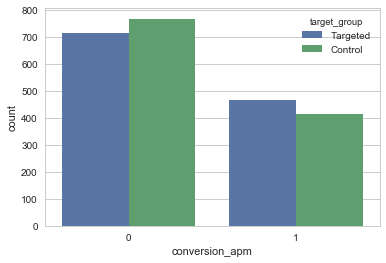

In [109]:
sns.countplot(x=df_campaign["conversion_apm"], hue=df_campaign["target_group"])
plt.savefig('conversion_apm vs target_group')

In [110]:
df_campaign_new = df_campaign.loc[:, df_campaign.columns != "cust_segment" ]
df_campaign_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 14 columns):
prdt_type              2360 non-null object
brand                  2360 non-null object
milestone              2360 non-null object
target_group           2360 non-null object
campaign_month         2360 non-null object
selected_qty           2360 non-null int64
mailed_count           2360 non-null int64
response_count         2360 non-null int64
response_sales_amt     2360 non-null float64
mail_rate              2360 non-null float64
response_rate          2360 non-null float64
amount_per_response    2178 non-null float64
amount_per_mail        2360 non-null float64
conversion_apm         2360 non-null int32
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 249.0+ KB


In [113]:
prdt_type = pd.get_dummies(df_campaign_new["prdt_type"], drop_first = True)
brand = pd.get_dummies(df_campaign_new["brand"], drop_first = True)
milestone = pd.get_dummies(df_campaign_new["milestone"], drop_first = True)
target_group = pd.get_dummies(df_campaign_new["target_group"], drop_first = True)
campaign_month = pd.get_dummies(df_campaign_new["campaign_month"], drop_first = True)
#cust_segment = pd.get_dummies(df_campaign_new["cust_segment"], drop_first = True)

df_campaign_new.drop(["prdt_type","brand", "milestone", "target_group","campaign_month", "mailed_count","response_sales_amt"
        ,"mail_rate", "response_rate","amount_per_response","amount_per_mail"],axis=1,inplace=True)

df_campaign_new = pd.concat([df_campaign_new, prdt_type, brand, milestone, target_group, campaign_month], axis = 1)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [114]:
logit_model=sm.Logit(df_campaign_new["conversion_apm"],df_campaign_new.loc[:, df_campaign_new.columns != "conversion_apm" ])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.503585
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.237      
Dependent Variable: conversion_apm   AIC:              2416.9225  
Date:               2023-01-17 06:33 BIC:              2532.2509  
No. Observations:   2360             Log-Likelihood:   -1188.5    
Df Model:           19               LL-Null:          -1557.7    
Df Residuals:       2340             LLR p-value:      2.5724e-144
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
selected_qty       0.0000   0.0000   1.6553 0.0979 -0.0000  0.0000
response_count     0.0034   0.0008   4.3216 0.0000  0

With respect to Prdt-1, Prdt-2's conversion (amount per mail) odds ratio decreases by exp(-0.6482), similarly with respect to Control group, Targeted group has higher odds of conversion, and brand C also has relatively higher conversion odds

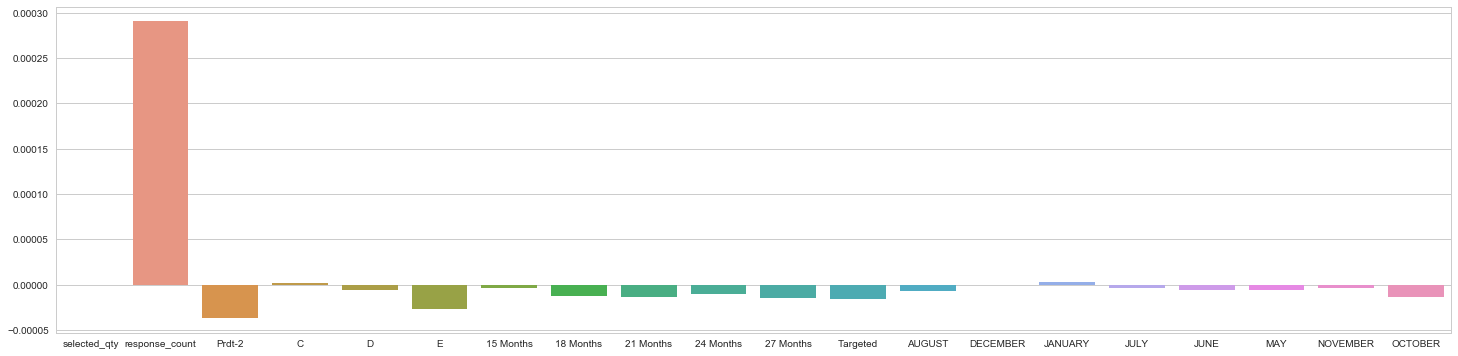

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df_campaign_new.loc[:, df_campaign_new.columns != "conversion_apm" ], df_campaign_new["conversion_apm"], test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
importance = logreg.coef_[0]

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot (x=X_train.columns, y = importance, ax=ax)
plt.savefig('feature importance')

In [141]:
df_campaign_new["apm_conversion_probab"] = logreg.predict_proba(df_campaign_new.loc[:, df_campaign_new.columns != "conversion_apm"])[:,0]

In [144]:
df_campaign_new.to_excel("Campaign details with probability.xlsx")